**Plotting Seahorse Results**

In [2]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

from ABCA7lof2.seahorse import ImageBrowser, compute_seahorse_measures_per_well_long_run, compute_seahorse_measures_per_well_short_run, plot_boxplot_by_treatment

In [ ]:
from statannotations.Annotator import Annotator

def plot_boxplot_by_treatment(d, x_val, y_val, order, pairs, palette, ylim):
    # Draw the boxplot with a semi-transparent fill (alpha=0.5) applied via boxprops.
    ax = sns.boxplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        palette=palette, 
        order=order, 
        width=0.4, 
       # capsize=0.1, 
        linewidth=1,

        showfliers=False
    )

    ax.set_ylim(0,ylim)
    ax.set_xlim(-0.5, len(order)+5)
    # Overlay the stripplot
    sp = sns.stripplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        dodge=False, 
        jitter=0.05, 
        alpha=1,  
        order=order, 
        color='black',
        #palette=palette,
        size=3
    )

    #plt.ylim(0, plt.ylim()[1])
    # Shift the stripplot points slightly to the left.
    shift = 0.4  # Adjust this value as needed
    for i, coll in enumerate(sp.collections):
        # if i == 0:
        #     shift = 0.4
        # elif i == 1:
        #     shift = 0.4
        # elif i == 2:
        #     shift = 0.4
            
        offsets = coll.get_offsets()
        # Subtract from the x-coordinate to move left
        offsets[:, 0] = offsets[:, 0] + shift
        coll.set_offsets(offsets)
    # Add statistical annotations
    annotator = Annotator(ax, pairs, data=d, x=x_val, y=y_val, order=order)
    annotator.configure(test='t-test_ind', text_format='full', loc='outside',
                        verbose=2, show_test_name=False, line_offset_to_group=1,  # Increases space between the brackets and the plot
    text_offset=4, line_width=1)
    annotator.apply_and_annotate()

    plt.xticks(rotation=0)
    plt.xlabel('')

    # Adjust the boxes so that the face remains semi-transparent while the edge is opaque.
    # Try iterating over both ax.artists and ax.patches.
    for patch in ax.patches:
        # Get the current facecolor (an RGBA tuple)
        fc = patch.get_facecolor()
        # Set the facecolor to have your desired alpha (e.g., 0.5)
        patch.set_facecolor((fc[0], fc[1], fc[2], 0.5))
        # Set the edgecolor to the same RGB but fully opaque (alpha=1)
        #patch.set_edgecolor((fc[0], fc[1], fc[2], 1.0))
        patch.set_linewidth(1)

    return ax


#plt.savefig('../../paper/main_plots/tmrm_choline_boxplot.png', dpi=300, bbox_inches='tight')


In [113]:
import os
import urllib.request
### Save batch 1 data
filenames = [
    "batch1_df_quant.csv", 
    "batch1.csv", 
    "iN_ABCA7KO_50k_25k_03132024.xlsx", 
    "batch3_df_quant.csv", 
    "batch3.csv", 
    "iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx", 
    "batch4_df_quant.csv", 
    "batch4.csv",
    "iN030620240_ABCA7KO_CDP-choline_04032024.xlsx"
]

output_dir = "../../seahorse/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in filenames:
    # Skip if file already exists
    local_filename = os.path.join(output_dir, filename)
    if os.path.exists(local_filename):
        print(f"Skipping {filename} - already downloaded")
        continue
    url = f'https://storage.googleapis.com/abca7lof/seahorse/{filename}'
    local_filename = os.path.join(output_dir, filename)
    urllib.request.urlretrieve(url, local_filename)
    print(f"Downloaded {filename} to {local_filename}")

Skipping batch1_df_quant.csv - already downloaded
Skipping batch1.csv - already downloaded
Skipping iN_ABCA7KO_50k_25k_03132024.xlsx - already downloaded
Downloaded batch3_df_quant.csv to ../../seahorse/batch3_df_quant.csv
Downloaded batch3.csv to ../../seahorse/batch3.csv
Downloaded iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx to ../../seahorse/iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx
Downloaded batch4_df_quant.csv to ../../seahorse/batch4_df_quant.csv
Downloaded batch4.csv to ../../seahorse/batch4.csv
Downloaded iN030620240_ABCA7KO_CDP-choline_04032024.xlsx to ../../seahorse/iN030620240_ABCA7KO_CDP-choline_04032024.xlsx


## LoF Effects

#### Batch 1

In [4]:
# load data
file_path = '../../seahorse/iN_ABCA7KO_50k_25k_03132024.xlsx'
x = ImageBrowser(file_path, long=False)

Output()

In [20]:
x.df

,Measurement,Well,Group,Time,OCR,ECAR,PER,randID
0,1,A01,Background,1.302014,0.0,0.0,0,52
1,1,A02,Background,1.302014,0.0,0.0,0,23
2,1,A03,Background,1.302014,0.0,0.0,0,63
3,1,A04,Background,1.302014,0.0,0.0,0,13
4,1,A05,Background,1.302014,0.0,0.0,0,26
...,...,...,...,...,...,...,...,...
1147,12,H08,Background,72.914893,0.0,0.0,0,82
1148,12,H09,Background,72.914893,0.0,0.0,0,40
1149,12,H10,Background,72.914893,0.0,0.0,0,15
1150,12,H11,Background,72.914893,0.0,0.0,0,80


In [12]:
# save filtering results
temp = pd.DataFrame(x.discard)
temp['keep'] = 0

temp2 = pd.DataFrame(x.keep_ids)
temp2['keep'] = 1

temp3 = pd.concat((temp,temp2))
temp3['batch'] = file_path

temp3.to_csv('../processed_data/seahorse_filtered/batch1.csv')

In [6]:
# load the filtered data
temp = pd.read_csv('../../seahorse/batch1.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_59197/1310166236.py:4: UserWarning: The palette list has more values (96) than needed (42), which may not be intended.
  sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = 'o', linewidth=0.5)
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: 

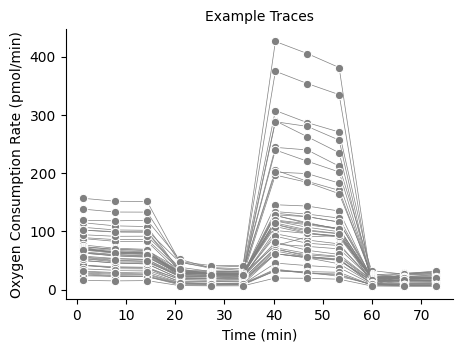

In [25]:
# plot keep ids
plt.figure(figsize=(5, 3.5))
temp = x.df
sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = 'o', linewidth=0.5)
plt.legend().set_visible(False)
plt.title('Example Traces', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)


plt.savefig('../../paper/extended_plots/rep_seahorse_curves_all.png', dpi=300, bbox_inches='tight')


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

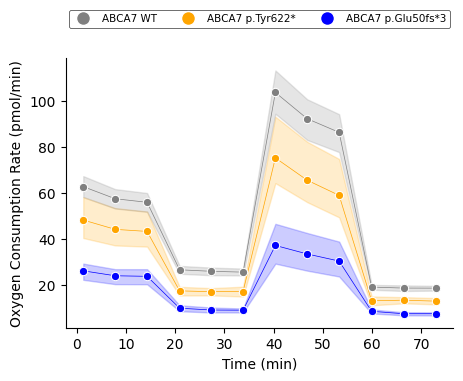

In [58]:
from matplotlib.lines import Line2D

# plot traces
plt.figure(figsize=(5, 3.5))

temp = x.df
sns.lineplot(data=temp[np.array([x in set(['Y622 25k', 'G2 25k', 'E3 25k']) for x in temp['Group']]) & np.array([i in set(keep_ids) for i in temp['Well']])], x = 'Time', y='OCR', hue = 'Group', marker = 'o', palette=['orange', 'grey',  'blue'], linewidth=0.5)

plt.legend().set_visible(False)
plt.title('', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)

labels = ['ABCA7 WT', 'ABCA7 p.Tyr622*', 'ABCA7 p.Glu50fs*3']
palette = {'ABCA7 WT': 'grey', 'ABCA7 p.Tyr622*': 'orange', 'ABCA7 p.Glu50fs*3': 'blue'}
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)


plt.savefig('../../paper/extended_plots/rep_seahorse_curves_by_line.png', dpi=300, bbox_inches='tight')

#plt.savefig('../pdf_figures/batch_1_traces_25K.pdf')


Text(0.5, 1.0, 'kept curves')

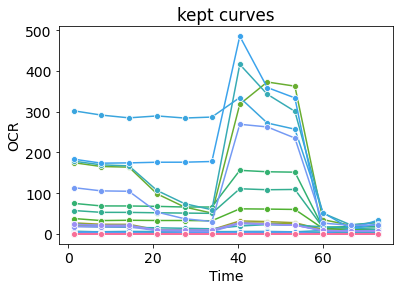

In [170]:
# plot discard ids
temp = x.df
sns.lineplot(data=temp[[i in set(discard) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', marker = 'o')
plt.legend().set_visible(False)
plt.title('discard curves')

In [31]:
# compute results
df = temp[[i in set(x.keep_ids) for i in temp['Well']]]

dictionary = dict(zip(df['Well'], df['Group']))

out = []

for well in np.unique(df['Well']):
    
    CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp = compute_seahorse_measures_per_well_short_run(well, df)
    condition = dictionary[well]
    out.append([condition, CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp])
    
df_quant = pd.DataFrame(out)
df_quant.columns = ['condition', 'CE', 'SRC', 'ATP_of_MAX', 'basal', 'proton_leak', 'atp_linked', 'max_resp']
df_quant['1-CE'] = 1-df_quant['CE']

df_quant.to_csv('../processed_data/seahorse_filtered/batch1_df_quant.csv')

In [307]:
# which conditions do we have after filtering?
df_quant = pd.read_csv('../../seahorse/batch1_df_quant.csv')
pd.DataFrame(np.unique(df_quant['condition'], return_counts=True))

,0,1,2,3,4,5
0,E3 25k,E3 50k,G2 25k,G2 50k,Y622 25k,Y622 50k
1,10,8,7,1,7,9


In [308]:
# compute the means
T = (df_quant.groupby('condition')['1-CE'].mean().reset_index())
dictionary = dict(zip(T['condition'], T['1-CE']))

In [63]:
df_quant.head()

,Unnamed: 0,condition,CE,SRC,ATP_of_MAX,basal,proton_leak,atp_linked,max_resp,1-CE
0,0,Y622 50k,0.911050,0.376527,0.343035,783.770217,69.716228,714.053989,2081.575973,0.088950
1,1,Y622 50k,0.868756,0.366078,0.318033,976.674866,128.182921,848.491945,2667.939311,0.131244
2,2,Y622 50k,0.897556,0.384848,0.345423,982.059034,100.605930,881.453105,2551.807879,0.102444
3,3,Y622 50k,0.884841,0.373342,0.330348,1173.164864,135.100570,1038.064294,3142.331643,0.115159
4,4,Y622 50k,0.950935,0.381674,0.362947,786.460983,38.587932,747.873051,2060.559168,0.049065


E3 25k vs. Y622 25k: t-test independent samples, P_val:2.225e-05 t=6.050e+00
E3 25k vs. G2 25k: t-test independent samples, P_val:9.959e-07 t=7.906e+00


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


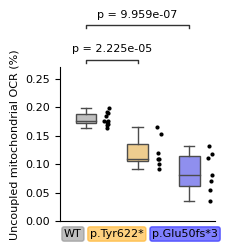

In [309]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = 0.27 )

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)

plt.rcParams.update({'font.size': 8})

plt.savefig('../../paper/extended_plots/uncoupling_quantification_batch1.png', dpi=300, bbox_inches='tight')

In [110]:
# # plot the results
# order = ['E3 25k', 'Y622 25k', 'G2 25k']
# pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
# palette=['grey', 'orange', 'blue']

# plt.figure(figsize=(2,5))

# plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order, pairs, palette) 
# plt.ylim(bottom=0)

# for i, name in enumerate(order):
#     plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],3)),
#                     xy=(i+.25, dictionary[name]),
#                     xytext=(0 + 3, dictionary[name]),
#                     arrowprops=dict(facecolor=palette[i], edgecolor=palette[i], shrink=0.05, headwidth=5, width=1))

# plt.rcParams.update({'font.size': 14})
# plt.xticks(ticks=[0, 1, 2], labels=['WT', 'p.Tyr622*','p.Glu50fs*3'], rotation=45)
# plt.ylabel('Relative Uncoupling (1-CE)')
# #plt.savefig('../pdf_figures/batch_1_CE_25K.pdf')


In [111]:
# # plot the results
# order = ['E3 50k', 'Y622 50k', 'G2 50k']
# pairs = [(('E3 50k'), ('Y622 50k')),(('E3 50k'), ('G2 50k'))]
# palette=['grey', 'orange', 'blue']

# plt.figure(figsize=(2,5))

# plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order, pairs, palette) 
# plt.ylim(bottom=0)

# for i, name in enumerate(order):
#     plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],3)),
#                     xy=(i+.25, dictionary[name]),
#                     xytext=(0 + 3, dictionary[name]),
#                     arrowprops=dict(facecolor=palette[i], edgecolor=palette[i], shrink=0.05, headwidth=5, width=1))

# plt.rcParams.update({'font.size': 14})
# plt.xticks(ticks=[0, 1, 2], labels=['WT', 'p.Tyr622*','p.Glu50fs*3'], rotation=45)
# plt.ylabel('Relative Uncoupling (1-CE)')
# plt.savefig('../pdf_figures/batch_1_CE_50k.pdf')


#### Batch 3

In [11]:
# load data
file_path = '../raw_data/seahorse/iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx'
x = ImageBrowser(file_path, long=False)

Output()

In [123]:
# save filtering results
temp = pd.DataFrame(x.discard)
temp['keep'] = 0

temp2 = pd.DataFrame(x.keep_ids)
temp2['keep'] = 1

temp3 = pd.concat((temp,temp2))
temp3['batch'] = file_path

temp3.to_csv('../processed_data/seahorse_filtered/batch3.csv')

In [12]:
# load the filtered data
temp = pd.read_csv('../processed_data/seahorse_filtered/batch3.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

Text(0.5, 1.0, 'kept curves')

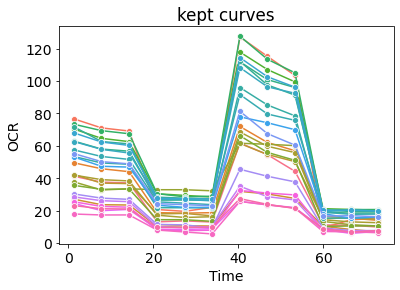

In [172]:
# plot keep ids
temp = x.df
sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', marker = 'o')
plt.legend().set_visible(False)
plt.title('kept curves')

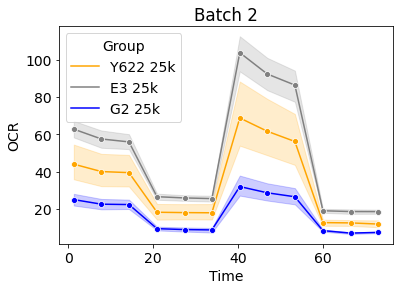

In [174]:
# plot traces
temp = x.df
sns.lineplot(data=temp[np.array([x in set(['Y622 25k', 'G2 25k', 'E3 25k']) for x in temp['Group']]) & np.array([i in set(keep_ids) for i in temp['Well']])], x = 'Time', y='OCR', hue = 'Group', marker = 'o', palette=['orange', 'grey',  'blue'])
plt.title('Batch 2')

plt.savefig('../pdf_figures/batch_2_traces_25K.pdf')


Text(0.5, 1.0, 'kept curves')

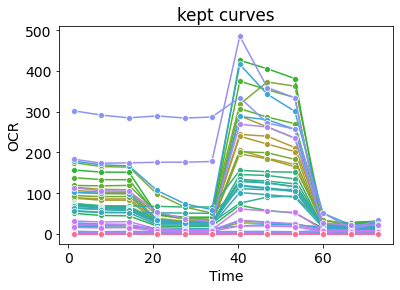

In [175]:
# plot discard ids
temp = x.df
sns.lineplot(data=temp[[i in set(discard) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', marker = 'o')
plt.legend().set_visible(False)
plt.title('kept curves')

In [126]:
# compute results
df = temp[[i in set(x.keep_ids) for i in temp['Well']]]

dictionary = dict(zip(df['Well'], df['Group']))

out = []

for well in np.unique(df['Well']):
    
    CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp = compute_seahorse_measures_per_well_short_run(well, df)
    condition = dictionary[well]
    out.append([condition, CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp])
    
df_quant = pd.DataFrame(out)
df_quant.columns = ['condition', 'CE', 'SRC', 'ATP_of_MAX', 'basal', 'proton_leak', 'atp_linked', 'max_resp']
df_quant['1-CE'] = 1-df_quant['CE']

df_quant.to_csv('../processed_data/seahorse_filtered/batch3_df_quant.csv')

In [304]:
df_quant = pd.read_csv('../../seahorse/batch3_df_quant.csv')

In [115]:
# which conditions do we have after filtering?
pd.DataFrame(np.unique(df_quant['condition'], return_counts=True))

,0,1,2
0,E3 25k,G2 25k,Y622 25k
1,8,6,10


E3 25k vs. Y622 25k: t-test independent samples, P_val:2.342e-02 t=2.505e+00
E3 25k vs. G2 25k: t-test independent samples, P_val:3.004e-03 t=3.706e+00


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


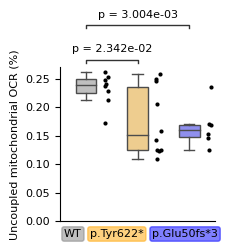

In [306]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = 0.27)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)

plt.rcParams.update({'font.size': 8})

plt.savefig('../../paper/extended_plots/uncoupling_quantification_batch2.png', dpi=300, bbox_inches='tight')

#### Batch 4

In [118]:
# load data
file_path = '../../seahorse/iN030620240_ABCA7KO_CDP-choline_04032024.xlsx'
x = ImageBrowser(file_path, long=False)

Output()

In [177]:
# save filtering results
temp = pd.DataFrame(x.discard)
temp['keep'] = 0

temp2 = pd.DataFrame(x.keep_ids)
temp2['keep'] = 1

temp3 = pd.concat((temp,temp2))
temp3['batch'] = file_path

temp3.to_csv('../processed_data/seahorse_filtered/batch4.csv')

In [119]:
# load the filtered data
temp = pd.read_csv('../../seahorse/batch4.csv')
keep_ids = temp['0'][temp['keep']==1]
discard = temp['0'][temp['keep']==0]

In [120]:
# also remove this well that has much lower OCR compared to the rest: G05

keep_ids = keep_ids[[x not in ['G05'] for x in keep_ids]]

/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_59197/1039405169.py:4: UserWarning: The palette list has more values (96) than needed (16), which may not be intended.
  sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = 'o', linewidth=0.5)
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: 

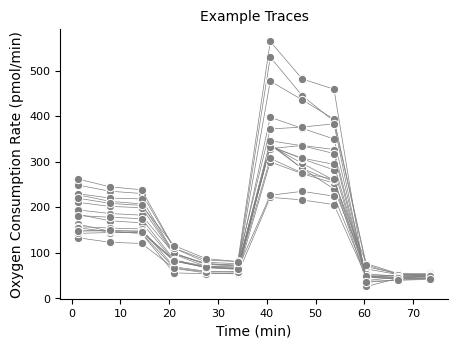

In [122]:
# plot keep ids
plt.figure(figsize=(5, 3.5))
temp = x.df
sns.lineplot(data=temp[[i in set(keep_ids) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', palette=['grey']*len(temp['Well'].unique()), marker = 'o', linewidth=0.5)
plt.legend().set_visible(False)
plt.title('Example Traces', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)


plt.savefig('../../paper/extended_plots/ocr_choline_rep_curves.png', dpi=300, bbox_inches='tight')


In [132]:
temp[np.array([x in set(['Y622 H20', 'Y622 CDP-choline']) for x in temp['Group']]) & np.array([i in set(keep_ids) for i in temp['Well']])]['Group'].unique()

array(['Y622 CDP-choline'], dtype=object)

In [134]:
temp['Group'].unique()

array(['Background', 'Unassigned', 'Y622 H2O', 'Y622 CDP-choline',
       'E3 H2O', 'E3 CDP-choline', 'G2 H2O', 'G2 CDP-choline'],
      dtype=object)

/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

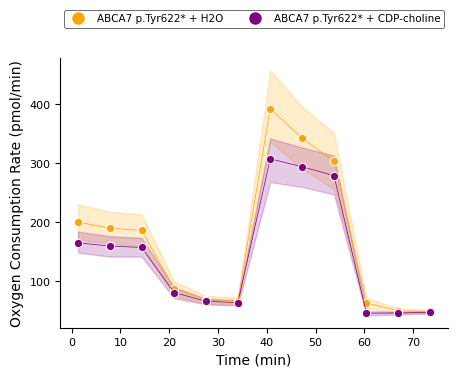

In [137]:
from matplotlib.lines import Line2D

# plot traces
plt.figure(figsize=(5, 3.5))

temp = x.df
sns.lineplot(data=temp[np.array([x in set(['Y622 H2O', 'Y622 CDP-choline']) for x in temp['Group']]) & np.array([i in set(keep_ids) for i in temp['Well']])], x = 'Time', y='OCR', hue = 'Group', marker = 'o', palette=['orange', 'purple'], linewidth=0.5)

plt.legend().set_visible(False)
plt.title('', fontsize=10)
plt.ylabel('Oxygen Consumption Rate (pmol/min)', fontsize=10)
plt.xlabel('Time (min)', fontsize=10)
# Remove top and bottom axis
sns.despine(top=True, right=True)

labels = ['ABCA7 p.Tyr622* + H2O', 'ABCA7 p.Tyr622* + CDP-choline']
palette = {'ABCA7 p.Tyr622* + H2O': 'orange', 'ABCA7 p.Tyr622* + CDP-choline': 'purple'}
handles = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=palette[label], markersize=10)
    for label in labels
]

legend = plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(.5, 1.2), ncol=3, frameon=True, fontsize=7.5)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(.5)


plt.savefig('../../paper/extended_plots/ocr_choline_curves_by_treatment.png', dpi=300, bbox_inches='tight')

#plt.savefig('../pdf_figures/batch_1_traces_25K.pdf')


Text(0.5, 1.0, 'discarded curves')

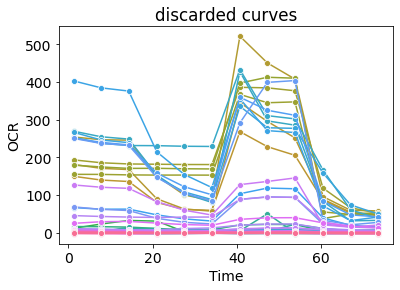

In [22]:
# plot discard ids
temp = x.df
sns.lineplot(data=temp[[i in set(discard) for i in temp['Well']]], x = 'Time', y='OCR', hue = 'Well', marker = 'o')
plt.legend().set_visible(False)
plt.title('discarded curves')

In [23]:
# compute results
df = temp[[i in set(keep_ids) for i in temp['Well']]]

dictionary = dict(zip(df['Well'], df['Group']))

out = []

for well in np.unique(df['Well']):
    
    CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp = compute_seahorse_measures_per_well_short_run(well, df)
    condition = dictionary[well]
    out.append([condition, CE, SRC, ATP_of_MAX, basal, proton_leak, atp_linked, max_resp])
    
df_quant = pd.DataFrame(out)
df_quant.columns = ['condition', 'CE', 'SRC', 'ATP_of_MAX', 'basal', 'proton_leak', 'atp_linked', 'max_resp']
df_quant['1-CE'] = 1-df_quant['CE']

#df_quant.to_csv('../processed_data/seahorse_filtered/batch4_df_quant.csv')

In [295]:
df_quant = pd.read_csv('../../seahorse/batch4_df_quant.csv')

In [139]:
# which conditions do we have after filtering?
pd.DataFrame(np.unique(df_quant['condition'], return_counts=True))

,0,1,2
0,G2 CDP-choline,Y622 CDP-choline,Y622 H2O
1,2,8,6


In [296]:
# compute the means
T = (df_quant.groupby('condition')['1-CE'].mean().reset_index())
dictionary = dict(zip(T['condition'], T['1-CE']))

In [142]:
df_quant

,Unnamed: 0,condition,CE,SRC,ATP_of_MAX,basal,proton_leak,atp_linked,max_resp,1-CE
0,0,Y622 H2O,0.860101,0.506540,0.435675,1538.005607,215.165168,1322.840439,3036.298289,0.139899
1,1,Y622 H2O,0.866722,0.668887,0.579739,2034.166221,271.110228,1763.055993,3041.119257,0.133278
2,2,Y622 H2O,0.844047,0.452911,0.382278,2331.139630,363.548722,1967.590908,5147.013180,0.155953
3,3,Y622 CDP-choline,0.778707,0.422298,0.328846,1783.576778,394.692501,1388.884278,4223.504092,0.221293
4,4,Y622 CDP-choline,0.829108,0.471628,0.391030,1053.825367,180.090559,873.734807,2234.442361,0.170892
5,5,Y622 CDP-choline,0.813605,0.547198,0.445203,2035.111189,379.333654,1655.777535,3719.151179,0.186395
6,6,Y622 CDP-choline,0.863216,0.466829,0.402974,1435.549942,196.360153,1239.189789,3075.108816,0.136784
7,7,Y622 H2O,0.841673,0.434959,0.366093,1435.467947,227.274044,1208.193903,3300.240743,0.158327
8,8,Y622 H2O,0.857220,0.433620,0.371708,2140.998022,305.692275,1835.305747,4937.496594,0.142780
9,9,Y622 H2O,0.860639,0.386886,0.332969,1320.777160,184.064591,1136.712569,3413.865769,0.139361


Y622 H2O vs. Y622 CDP-choline: t-test independent samples, P_val:2.820e-03 t=-3.740e+00


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


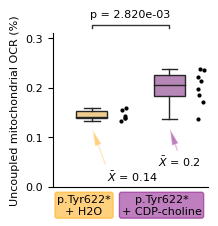

In [298]:
plt.figure(figsize=(2,2))

order = ['Y622 H2O', 'Y622 CDP-choline']
pairs = [(('Y622 H2O'), ('Y622 CDP-choline'))]
palette=['orange', 'purple']

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(df_quant['1-CE']) )

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)


ax1.text(-0.1, -0.05, "p.Tyr622*\n+ H2O", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(.9, -0.05, "p.Tyr622*\n+ CDP-choline", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="purple", ec="purple", alpha=0.5), fontsize=8)


name = 'Y622 H2O'
i = 0
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(0, .12),
                    xytext=(0.2 , 0.01), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))

name = 'Y622 CDP-choline'
i = 1
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(1, .12),
                    xytext=(0.85 , 0.04), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))


plt.rcParams.update({'font.size': 8})


plt.savefig('../../paper/main_plots/uncoupling_choline_quantification.png', dpi=300, bbox_inches='tight')

Y622 H2O vs. Y622 CDP-choline: t-test independent samples, P_val:6.808e-01 t=4.215e-01


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


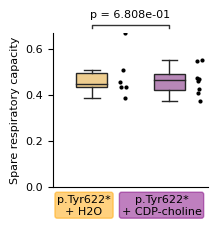

In [212]:
plt.figure(figsize=(2,2))

order = ['Y622 H2O', 'Y622 CDP-choline']
pairs = [(('Y622 H2O'), ('Y622 CDP-choline'))]
palette=['orange', 'purple']

ax1 = plot_boxplot_by_treatment(df_quant, 'condition', 'SRC', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(df_quant['SRC']) )

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Spare respiratory capacity', fontsize=8)


ax1.text(-0.1, -0.05, "p.Tyr622*\n+ H2O", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(.9, -0.05, "p.Tyr622*\n+ CDP-choline", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="purple", ec="purple", alpha=0.5), fontsize=8)


plt.rcParams.update({'font.size': 8})


plt.savefig('../../paper/extended_plots/src_choline_quantification.png', dpi=300, bbox_inches='tight')

## combine across batches for main figure

In [213]:
df_quant = pd.read_csv('../../seahorse/batch1_df_quant.csv')
df_quant2 = pd.read_csv('../../seahorse/batch3_df_quant.csv')

In [218]:
all_data = pd.concat((df_quant2, df_quant))
all_data.index = np.arange(len(all_data))

In [221]:
# compute the means
T = (all_data.groupby('condition')['1-CE'].mean().reset_index())
dictionary = dict(zip(T['condition'], T['1-CE']))

In [215]:
pd.DataFrame(np.unique(all_data['condition'], return_counts=True))

,0,1,2,3,4,5
0,E3 25k,E3 50k,G2 25k,G2 50k,Y622 25k,Y622 50k
1,18,8,13,1,17,9


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


E3 25k vs. Y622 25k: t-test independent samples, P_val:2.308e-03 t=3.303e+00
E3 25k vs. G2 25k: t-test independent samples, P_val:2.200e-05 t=5.051e+00


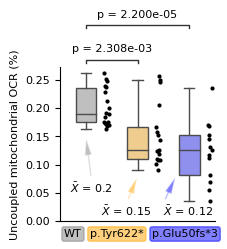

In [293]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(all_data, 'condition', '1-CE', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(all_data['1-CE'])+0.01 )

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Uncoupled mitochondrial OCR (%)', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)



name = 'E3 25k'
i = 0
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(0, .15),
                    xytext=(-0.3 , 0.05), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))

name = 'Y622 25k'
i = 1
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(1, .08),
                    xytext=(0.3 , 0.01), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))

name = 'G2 25k'
i = 2
plt.annotate(r'$\bar{X}$ = '+str(np.round(dictionary[name],2)),
                    xy=(1.742, .08),
                    xytext=(1.5 , 0.01), 
                    arrowprops=dict(facecolor=palette[i], alpha = 0.5, edgecolor='white', shrink=0.05, headwidth=5, width=1))



plt.rcParams.update({'font.size': 8})


plt.rcParams.update({'font.size': 8})

plt.savefig('../../paper/main_plots/uncoupling.png', dpi=300, bbox_inches='tight')

E3 25k vs. Y622 25k: t-test independent samples, P_val:7.247e-01 t=3.552e-01
E3 25k vs. G2 25k: t-test independent samples, P_val:7.235e-02 t=-1.865e+00


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


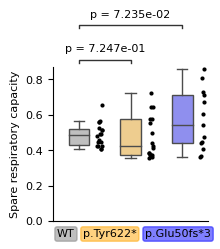

In [294]:
plt.figure(figsize=(2,2))

order = ['E3 25k', 'Y622 25k', 'G2 25k']
pairs = [(('E3 25k'), ('Y622 25k')),(('E3 25k'), ('G2 25k'))]
palette=['grey', 'orange', 'blue']

ax1 = plot_boxplot_by_treatment(all_data, 'condition', 'SRC', order = order, pairs = pairs,palette=palette, 
                                ylim = np.max(all_data['SRC'])+0.01 )

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Spare respiratory capacity', fontsize=8)

ax1.text(-0.25, -0.05, "WT", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.6, -0.05, "p.Tyr622*", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.92, -0.05, "p.Glu50fs*3", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)


plt.rcParams.update({'font.size': 8})


plt.rcParams.update({'font.size': 8})

plt.savefig('../../paper/extended_plots/SRC.png', dpi=300, bbox_inches='tight')

### Supp table

In [66]:
# batch 1
temp = pd.read_csv('../processed_data/seahorse_filtered/batch1.csv')
file_path = '../raw_data/seahorse/iN_ABCA7KO_50k_25k_03132024.xlsx'
df_quant = pd.read_csv('../processed_data/seahorse_filtered/batch1_df_quant.csv')
x = ImageBrowser(file_path, long=False)
data = pd.merge(x.df, temp.iloc[:,1:], left_on = 'Well', right_on = '0')
data1 = data[[x in set(['Background', 'E3 25k',  'G2 25k',  'Y622 25k']) for x in data['Group']]]

Output()

In [67]:
# batch 3
temp = pd.read_csv('../processed_data/seahorse_filtered/batch3.csv')
file_path = '../raw_data/seahorse/iN_ABCA7KO_50k_25k_03272024_iNbatch02282024.xlsx'
df_quant = pd.read_csv('../processed_data/seahorse_filtered/batch3_df_quant.csv')
x = ImageBrowser(file_path, long=False)
data = pd.merge(x.df, temp.iloc[:,1:], left_on = 'Well', right_on = '0')
data3 = data[[x in set(['Background', 'E3 25k',  'G2 25k',  'Y622 25k']) for x in data['Group']]]

Output()

In [72]:
# batch 4
temp = pd.read_csv('../processed_data/seahorse_filtered/batch4.csv')
file_path = '../raw_data/seahorse/iN030620240_ABCA7KO_CDP-choline_04032024.xlsx'
df_quant = pd.read_csv('../processed_data/seahorse_filtered/batch4_df_quant.csv')
x = ImageBrowser(file_path, long=False)
data = pd.merge(x.df, temp.iloc[:,1:], left_on = 'Well', right_on = '0')
data4 = data[[x in set(['Background','Y622 H2O','Y622 CDP-choline']) for x in data['Group']]]

Output()

In [73]:
pd.concat((data1, data3, data4))

,Measurement,Well,Group,Time,OCR,ECAR,PER,randID,0,keep,batch
0,1,A01,Background,1.302014,0.0,0.0,0,55,A01,0,../raw_data/seahorse/iN_ABCA7KO_50k_25k_031320...
1,2,A01,Background,7.788320,0.0,0.0,0,55,A01,0,../raw_data/seahorse/iN_ABCA7KO_50k_25k_031320...
2,3,A01,Background,14.277262,0.0,0.0,0,55,A01,0,../raw_data/seahorse/iN_ABCA7KO_50k_25k_031320...
3,4,A01,Background,20.883667,0.0,0.0,0,55,A01,0,../raw_data/seahorse/iN_ABCA7KO_50k_25k_031320...
4,5,A01,Background,27.357721,0.0,0.0,0,55,A01,0,../raw_data/seahorse/iN_ABCA7KO_50k_25k_031320...
...,...,...,...,...,...,...,...,...,...,...,...
1147,8,H12,Background,47.240718,0.0,0.0,0,95,H12,0,../raw_data/seahorse/iN030620240_ABCA7KO_CDP-c...
1148,9,H12,Background,53.770463,0.0,0.0,0,95,H12,0,../raw_data/seahorse/iN030620240_ABCA7KO_CDP-c...
1149,10,H12,Background,60.411534,0.0,0.0,0,95,H12,0,../raw_data/seahorse/iN030620240_ABCA7KO_CDP-c...
1150,11,H12,Background,66.947896,0.0,0.0,0,95,H12,0,../raw_data/seahorse/iN030620240_ABCA7KO_CDP-c...


In [81]:
df_quant = pd.read_csv('../processed_data/seahorse_filtered/batch1_df_quant.csv')
df_quant['batch'] = 0
df_quant2 = pd.read_csv('../processed_data/seahorse_filtered/batch3_df_quant.csv')
df_quant2['batch'] = 1
df_quant3 = pd.read_csv('../processed_data/seahorse_filtered/batch4_df_quant.csv')
df_quant3['batch'] = 2

In [84]:
all_data = pd.concat((df_quant, df_quant2,df_quant3))
all_data = all_data[[x in set(['Background','Y622 H2O','Y622 CDP-choline', 'E3 25k', 'Y622 25k', 'G2 25k']) for x in all_data['condition']]]

In [85]:
all_data

,Unnamed: 0,condition,CE,SRC,ATP_of_MAX,basal,proton_leak,atp_linked,max_resp,1-CE,batch
5,5,Y622 25k,0.908686,0.642863,0.584160,357.954492,32.686382,325.268109,556.813049,0.091314,0
6,6,Y622 25k,0.880605,0.575947,0.507182,759.844652,90.721285,669.123367,1319.296005,0.119395,0
7,7,Y622 25k,0.899011,0.647036,0.581693,401.019763,40.498580,360.521184,619.779261,0.100989,0
12,12,Y622 25k,0.890153,0.575718,0.512477,298.364931,32.774578,265.590353,518.248231,0.109847,0
13,13,Y622 25k,0.834012,0.725459,0.605041,429.824417,71.345807,358.478610,592.486366,0.165988,0
...,...,...,...,...,...,...,...,...,...,...,...
9,9,Y622 H2O,0.860639,0.386886,0.332969,1320.777160,184.064591,1136.712569,3413.865769,0.139361,2
10,10,Y622 CDP-choline,0.785804,0.407366,0.320110,1222.735164,261.904466,960.830698,3001.564527,0.214196,2
11,11,Y622 CDP-choline,0.763188,0.373770,0.285257,1271.553452,301.119157,970.434295,3401.965419,0.236812,2
12,12,Y622 CDP-choline,0.802464,0.459465,0.368704,1730.681687,341.872706,1388.808981,3766.730609,0.197536,2
